DEVELOPING OPTIMISER IN PYTHON: HYDROSTATIC THRUST BEARING

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

W(x) represents the load carrying capacity, 
Po(x) is the inlet pressure, 
Ef(x) denotes friction loss, 
Delta T(x) signifies temperature, 
P(x) stands for pressure,
h(x) refers to the oil thickness. 
These variables play integral roles in characterizing the system's performance and are optimized to achieve desired outcomes.

In [11]:
def W(x):
    part1 = (math.pi * Po(x))/ 2
    part2 = (pow(x3,2) - pow(x2,2)) / np.log(x3/x2)
    return part1 * part2

def Po(x):
    part1 = (6 * pow(10,-6) * x4 * x1)/ (math.pi * pow(h(x),3))
    part2 = np.log(x3/x2)
    return part1 * part2

def delta_T(x):
    return 2* (pow(10,P(x)) - 560)

def Ef(x):
    return 143.308 * delta_T(x) * x1

def P(x):
    result = (np.log10(np.log10(8.122 * x4 + 0.8)) - 10.04) / -3.55
    return result

def h(x):
    part1 = pow((1500 * math.pi)/60,2)
    part2 = (2 * pow(10,-6) * math.pi *x4)/Ef(x)
    part3 = (pow(x3,4)/4) - (pow(x2,4)/4)
    return part1 * part2 * part3

The optimization problem involves four key variables:
x1 denoting the flow rate (Q), 
x2 representing the recess radius (R0), 
x3 corresponding to the bearing step radius (R),
x4 symbolizing the viscosity of the fluid (μ).

In [12]:
x1,x2,x3,x4 = 4.19,11.57,6.69,10.65
x = np.array([x1,x2,x3,x4])

The optimization problem involves seven crucial constraints g1(x) to g7(x). 
These constraints address various aspects, including weight capacity, inlet oil pressure, oil temperature rise, oil film thickness geometric relationships, exit loss significance, and contact pressure. 
Specifically, they ensure structural integrity, operational oil parameters, prevention of overheating, effective lubrication, geometric configurations, efficiency, and safety. 
Collectively, these constraints establish operational boundaries, guaranteeing system reliability, efficiency, and safety during the optimization process.

In [13]:
def g1(x):
    return 101000 - W(x)

def g2(x):
    return Po(x) - 1000

def g3(x):
    return delta_T(x) - 50
    
def g4(x):
    return 0.001 -h(x)

def g5(x):
    return x2 - x3

def g6(x):
    part1 = 0.0307 * x1
    part2 = 772.8 * math.pi * Po(x) * h(x) * x3
    return (part1/part2)-0.001
    
def g7(x):
    return (W(x)/ math.pi * (np.power(x3,2) - np.power(x2,2))) - 5000

def f(x):
    return (Po(x) *x1/0.7) + Ef(x)

Random Search:

In [14]:
def model(x0, theta):
    """
    This is the linear model.
    Returns predictions y_hat for given X.
    """
    return theta[0] * x0 + theta[1]

def sum_squared_error(theta, x0, x):
    """
    Objective function -- sum of squared errors.
    """
    return np.sum((x - model(x0, theta))**2)


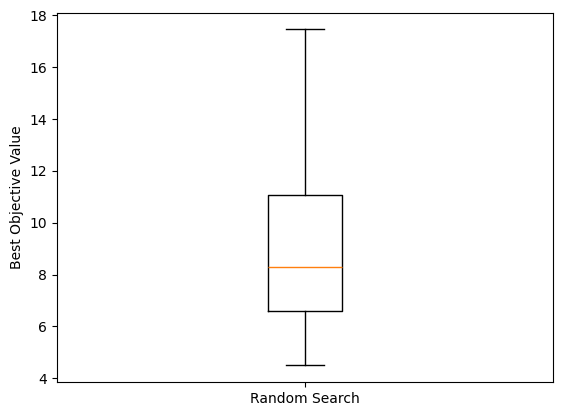

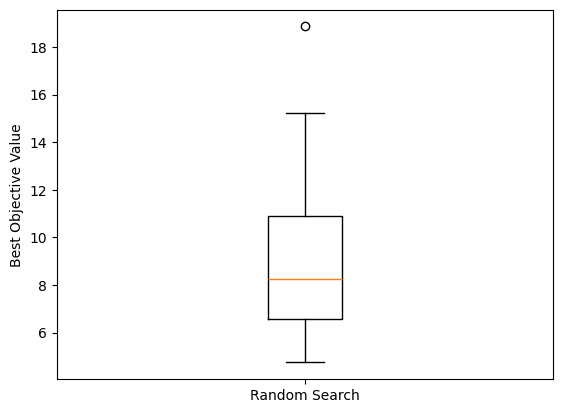

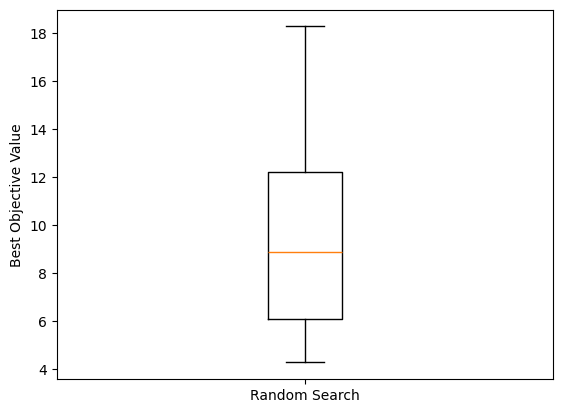

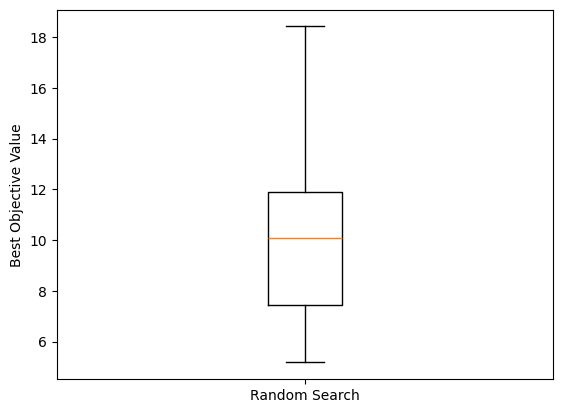

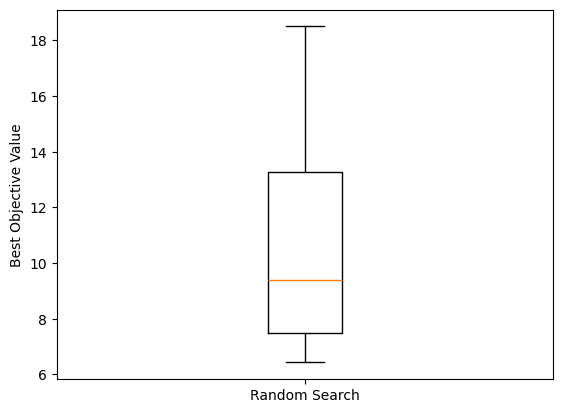

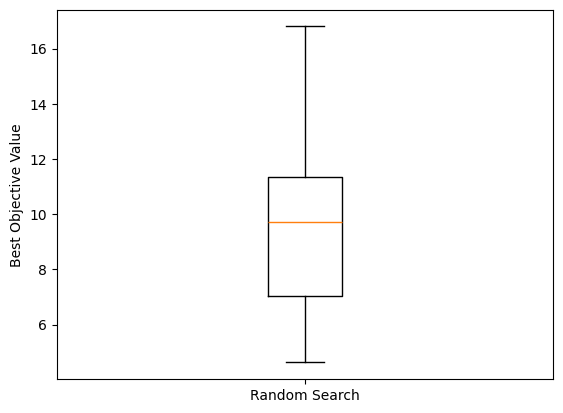

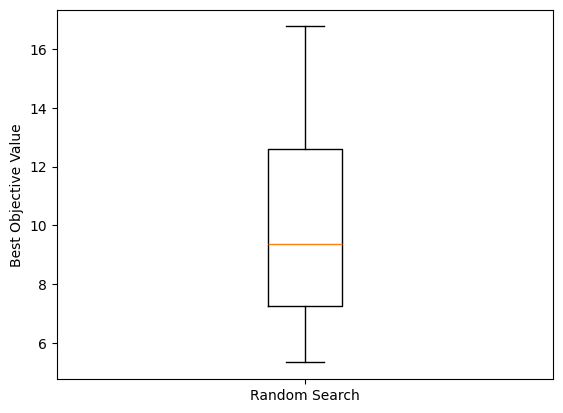

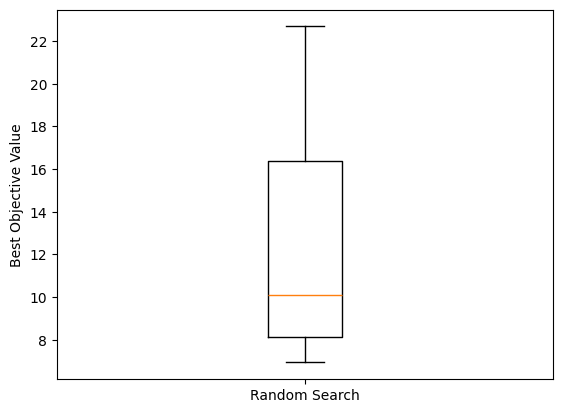

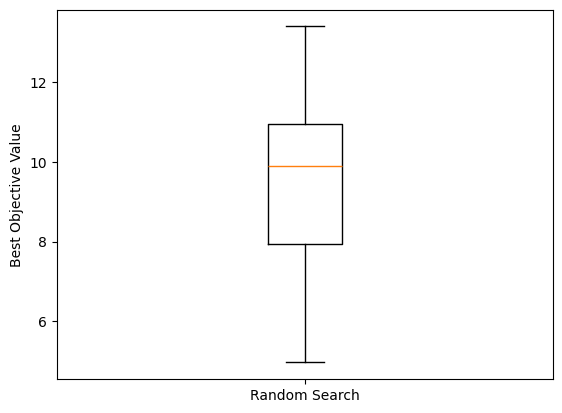

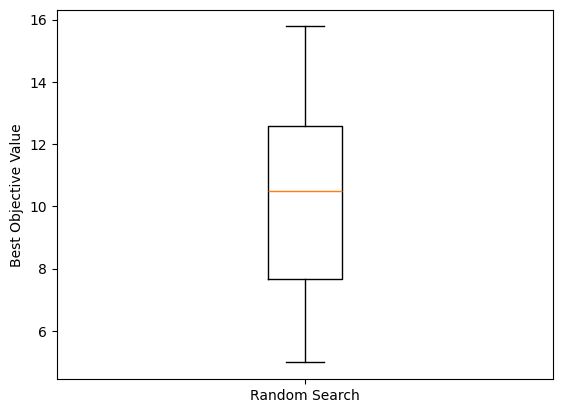

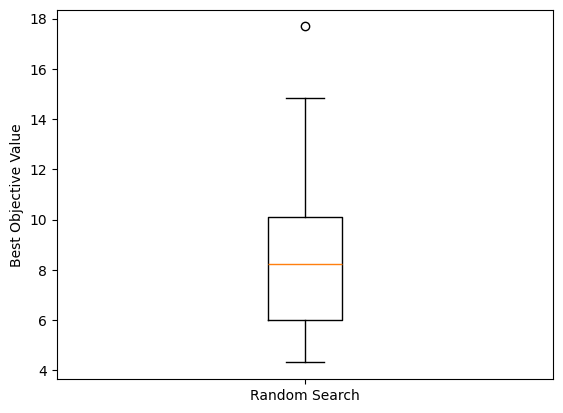

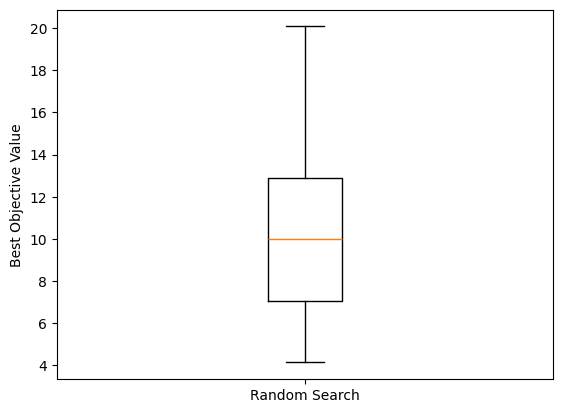

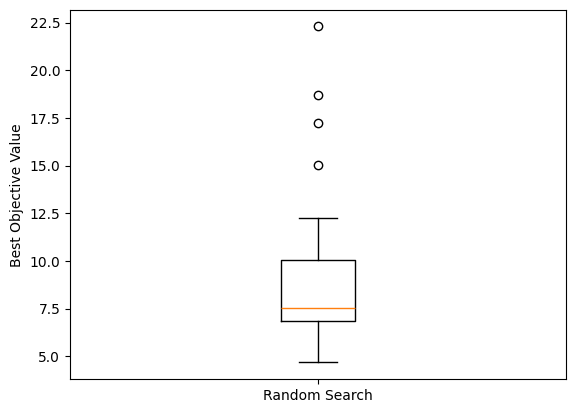

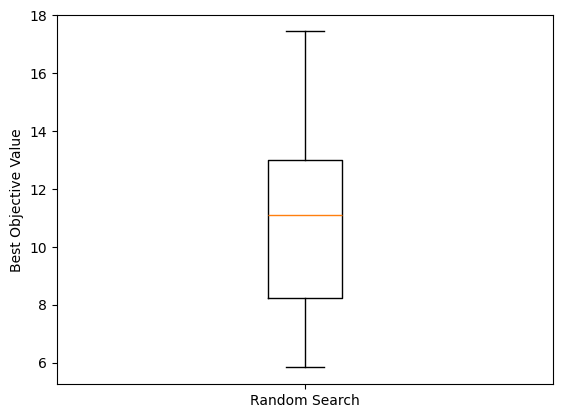

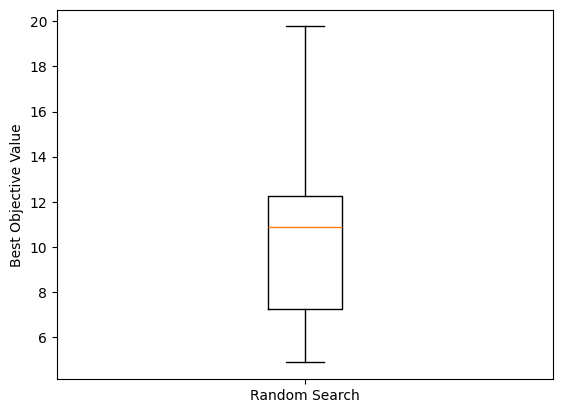

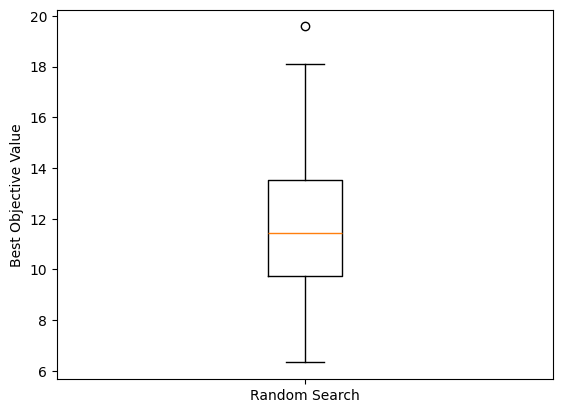

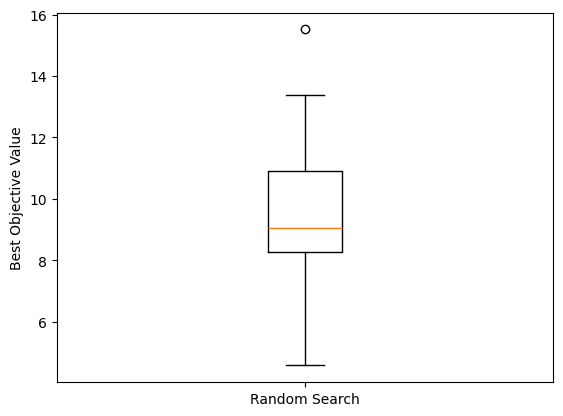

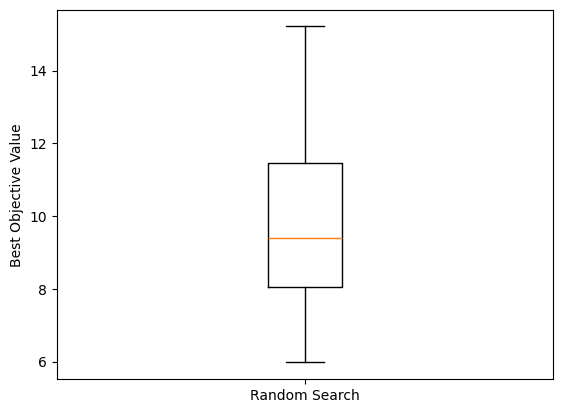

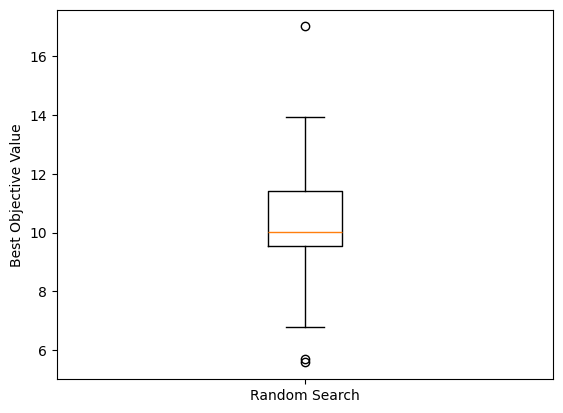

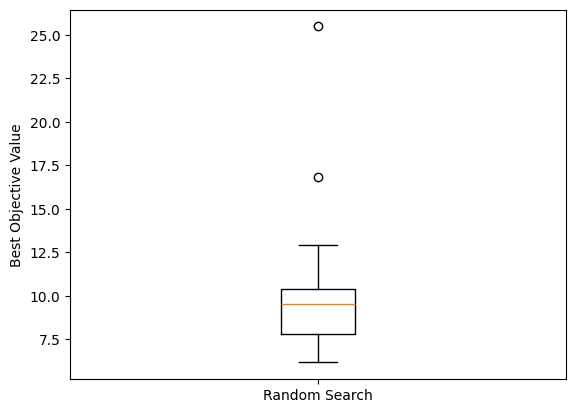

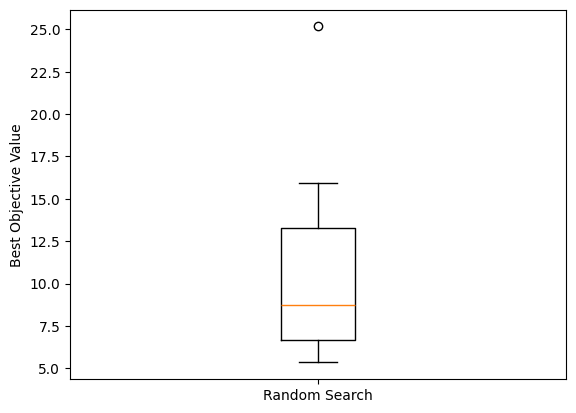

In [15]:
def random_search(function, max_iter, lower_bound,
                  upper_bound, fargs=()):
    points_to_evaluate = np.random.uniform(low=lower_bound,
                                           high=upper_bound,
                                           size=(max_iter, len(lower_bound)))
    results = np.array([function(point, *fargs)
                        for point in points_to_evaluate])
    best_ind = np.argmin(results)
    return points_to_evaluate[best_ind], results[best_ind]


# define hyper-parameters
number_of_samples = 10000
lower_bound = np.array([1,1,1,1])
upper_bound = np.array([16,16,16,16])


repeat =21
for _ in range(repeat):

    res = [random_search(sum_squared_error, number_of_samples,
                    lower_bound, upper_bound,
                    fargs=(x, x))[-1]
                    for i in range(repeat)]

    plt.boxplot(res)
    plt.xticks([1], ['Random Search'])
    plt.ylabel("Best Objective Value")
    plt.pause(0.001)
    plt.show()

Simulated Annealing: Due to the massive scaling of the data,algorithm is slow at processing  and this proves to be ineffective compared to random search. Random search seems to have good adaptivity towards small amounts of data. 

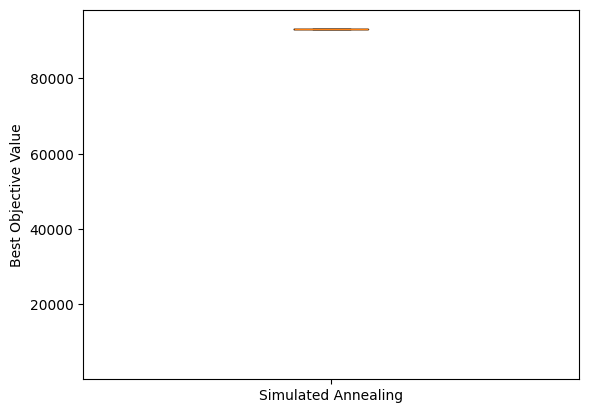

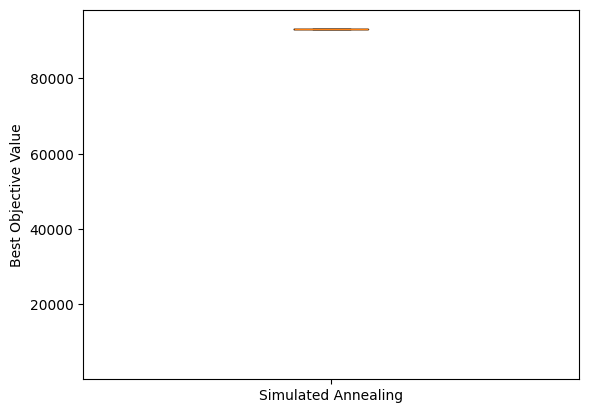

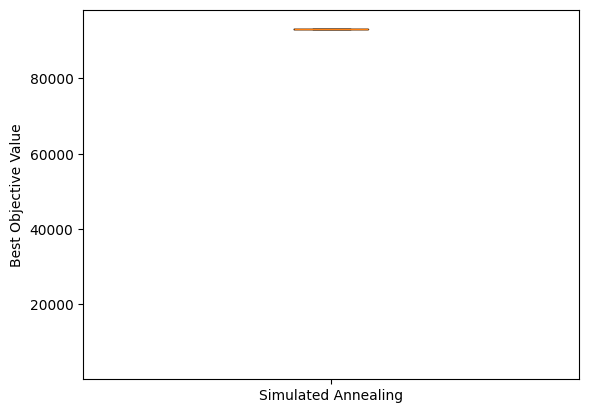

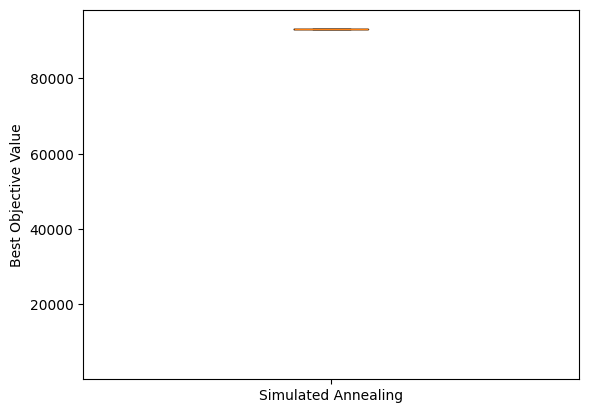

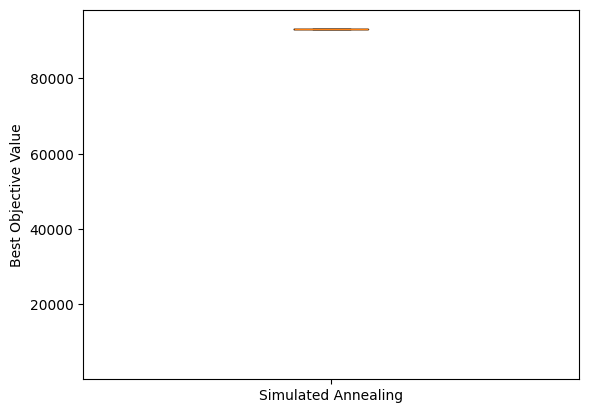

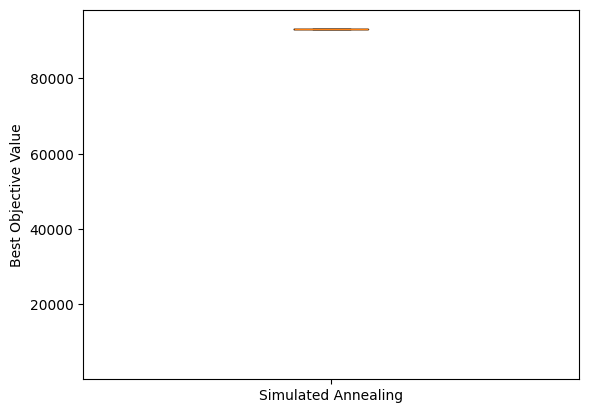

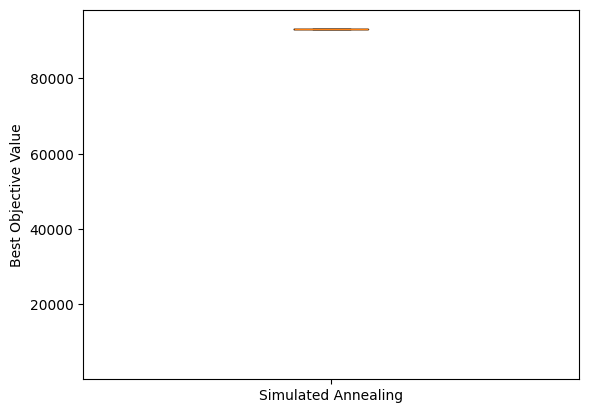

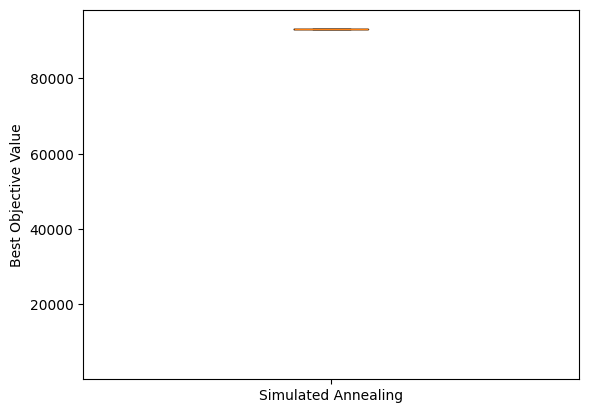

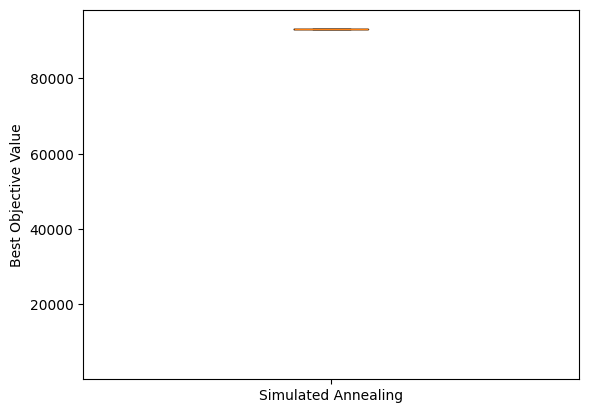

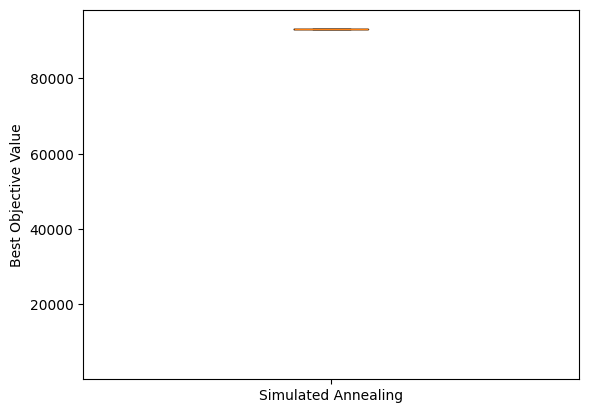

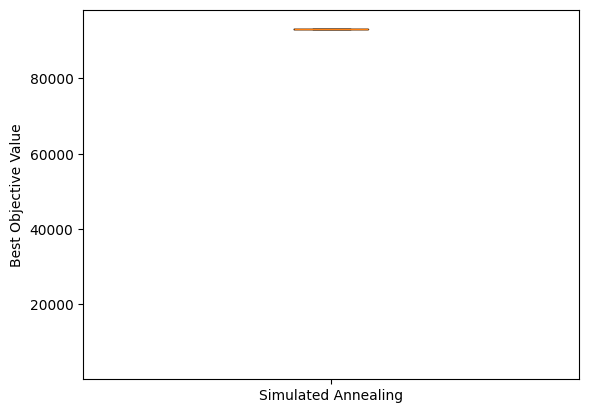

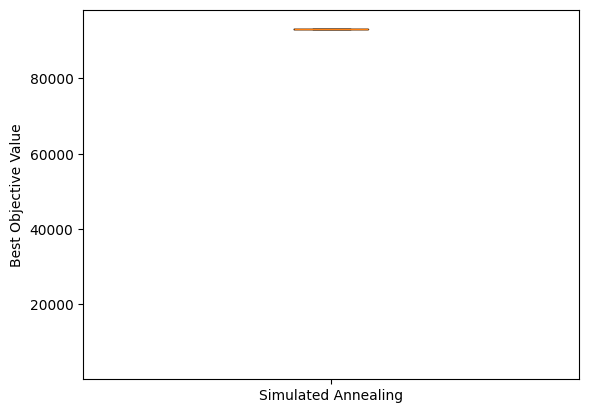

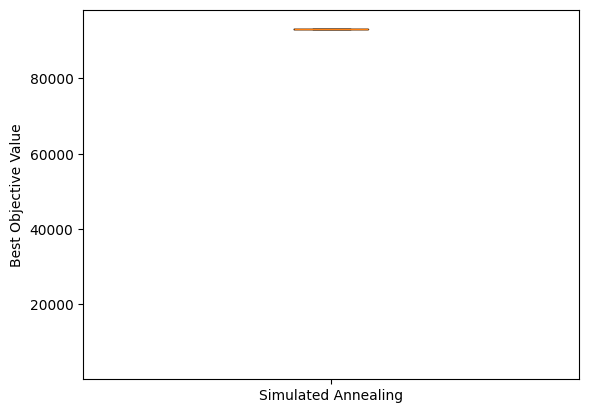

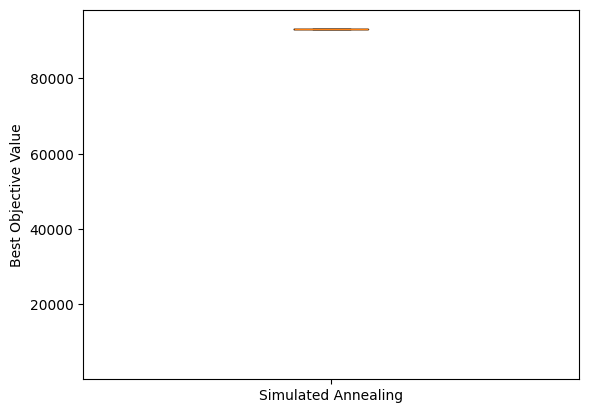

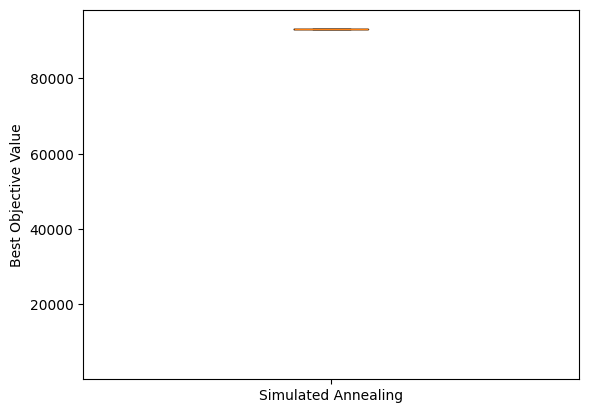

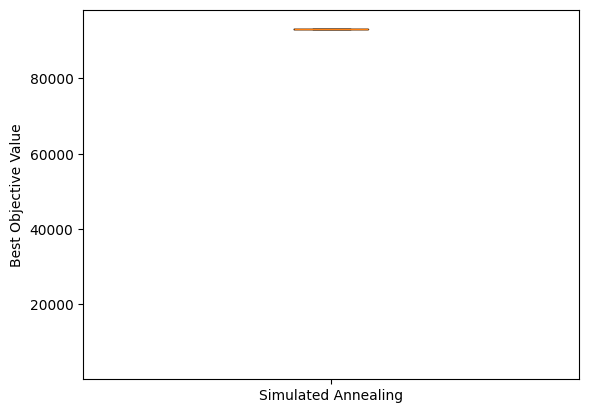

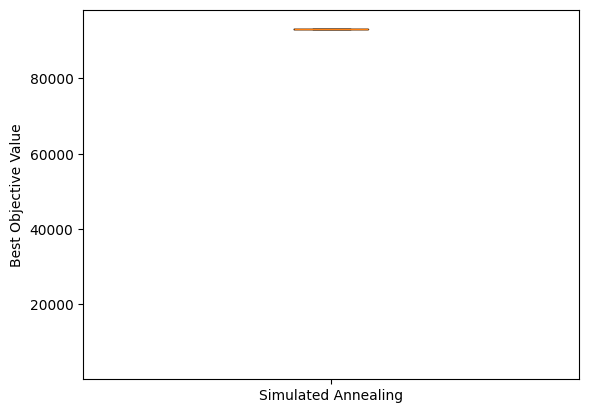

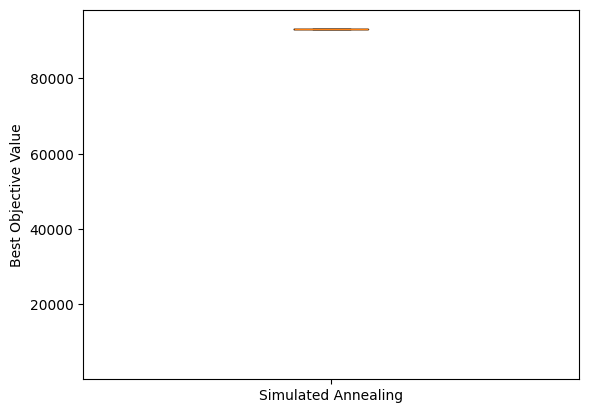

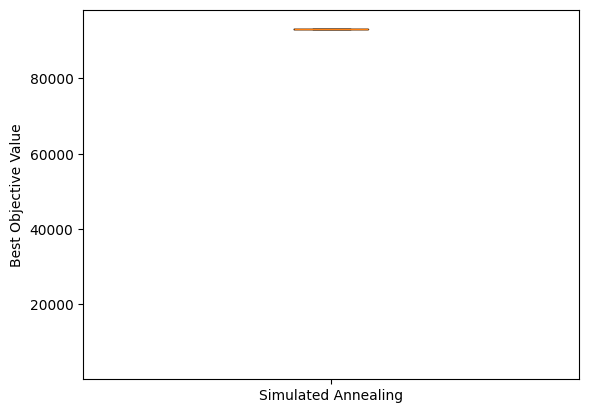

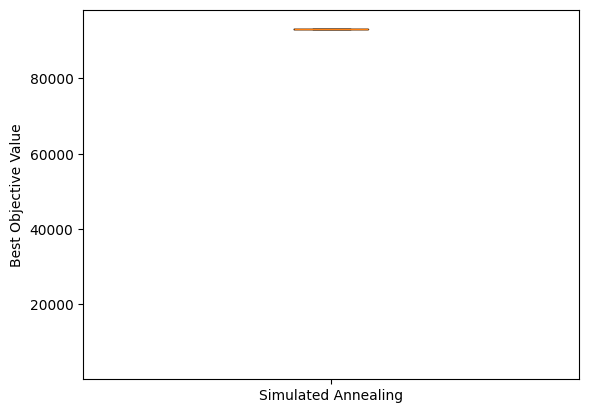

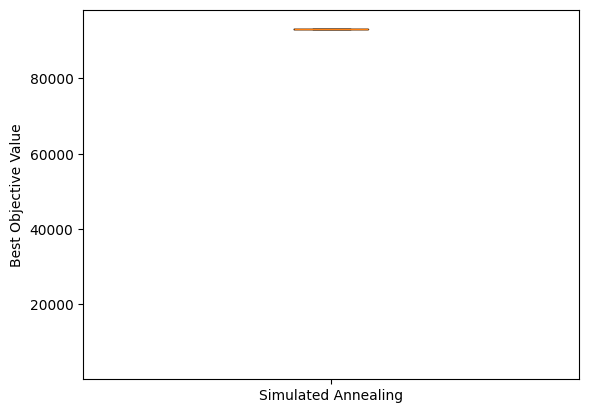

In [16]:
def sim_annealing(constraints, low_bound, upp_bound, iteration=10000, int_temp=100, cooling=0.95, seed=1, standard_dev_scale=0):
    
    constraints = [g1, g2, g3, g4, g5, g6, g7]
    current_sol = np.random.uniform(low=low_bound, high=upp_bound)
    current_val = f(current_sol) + sum(constraint(current_sol) for constraint in constraints)

    best_sol = current_sol
    best_val = current_val
    temp = int_temp

    for _ in range(iteration):
        seed += 1
        solution = current_sol + np.random.normal(scale=standard_dev_scale, size=current_sol.shape)

        new_val = f(solution) + sum(constraint(solution) for constraint in constraints)
        delta = new_val - current_val

        if delta < 0 or np.random.rand() < np.exp(-delta / temp):
            current_sol = solution
            current_val = new_val

            if current_val < best_val:
                best_sol = current_sol
                best_val = current_val

        temp *= cooling

    return best_sol, best_val

# Define the parameters
lower_bound = np.array([1])
upper_bound = np.array([16])

# Example usage:
repeat = 21
for _ in range(repeat):
    constraints = [g1, g2, g3, g4, g5, g6, g7]
    res1 = [sim_annealing(constraints, lower_bound, upper_bound)[-1] for i in range(repeat)]

    # Corrected boxplot code
    plt.boxplot([res1])
    plt.xticks([1], ['Simulated Annealing'])
    plt.ylim(16)
    plt.ylabel("Best Objective Value")
    plt.show()


In [17]:
print("Objective function output, f(x) =",(f(x)))
print("Constraint function output, g1(x) =", g1(x))
print("Constraint function output, g2(x) =", g2(x))
print("Constraint function output, g3(x) =", g3(x))
print("Constraint function output, g4(x) =", g4(x))
print("Constraint function output, g5(x) =", g5(x))
print("Constraint function output, g6(x) =", g6(x))
print("Constraint function output, g7(x) =", g7(x))

Objective function output, f(x) = -1784.0773507231927
Constraint function output, g1(x) = 101000.01528759542
Constraint function output, g2(x) = -1000.0000598304209
Constraint function output, g3(x) = -52.97118117373543
Constraint function output, g4(x) = -0.9196377239881502
Constraint function output, g5(x) = 4.88
Constraint function output, g6(x) = -0.14477999681964232
Constraint function output, g7(x) = -4999.566379402492
